A Clustering Of COD Players Using Kmeans
DataSet: 

1-Importing The Libraries And Reading The CSV File

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
%matplotlib inline

In [333]:
raw_df=pd.read_csv(r'C:\Users\user\Downloads\cod.csv')

In [334]:
raw_df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [335]:
raw_df.info

<bound method DataFrame.info of                         name  wins  kills   kdRatio  killstreak  level  \
0            RggRt45#4697369     0      0  0.000000           0      1   
1         JohniceRex#9176033     0      0  0.000000           0      1   
2     bootybootykill#1892064     0     66  1.031250           0      9   
3              JNaCo#5244172     3      2  0.400000           0      1   
4      gomezyayo_007#6596687     0      2  0.200000           0      1   
...                      ...   ...    ...       ...         ...    ...   
1553     ImranePROPG#2085215     0     51  0.432203           0     10   
1554      Miguel_mor#1492856     0      0  0.000000           0      1   
1555       Trianthor#3462590     0      0  0.000000           0      1   
1556     tinytrex594#3976133     0      0  0.000000           0      1   
1557      TomasFJ_05#2711069     1     35  0.686275           3      5   

      losses  prestige  hits  timePlayed  headshots  averageTime  gamesPlayed  

2-Exploring The Dataset

In [336]:
#this dataset contains many accounts that have not played a single game and make the data less accurate,lets start by removing those accounts
secondary_df=raw_df[raw_df["kills"]>1]
df=secondary_df[raw_df["timePlayed"]>1]
df.drop(["name"],axis=1,inplace=True)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17316\1034157940.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\user\AppData\Local\Temp\ipykernel_17316\1034157940.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
2,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64
3,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5
4,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10
5,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321
6,4,162,0.632812,4,6,2,0,568,8,35,2.000000,4,68,4836,24485,265.500000,5404,256


In [337]:
df.info

<bound method DataFrame.info of       wins  kills   kdRatio  killstreak  level  losses  prestige    hits  \
2        0     66  1.031250           0      9       0       110       0   
3        3      2  0.400000           0      1       0         0       0   
4        0      2  0.200000           0      1       0       110       0   
5      684  27011  1.066743          18    177      10       110   98332   
6        4    162  0.632812           4      6       2         0     568   
...    ...    ...       ...         ...    ...     ...       ...     ...   
1549    23    406  0.821862          12     10       6         1    1946   
1550   408   7530  0.799873          12     77       8        28   33533   
1551  1173  45764  1.078627          20    289      14       111  128437   
1553     0     51  0.432203           0     10       0       110       0   
1557     1     35  0.686275           3      5       1       110      17   

      timePlayed  headshots  averageTime  gamesPlayed  

Text(0, 0.5, 'Kill/Death ratio')

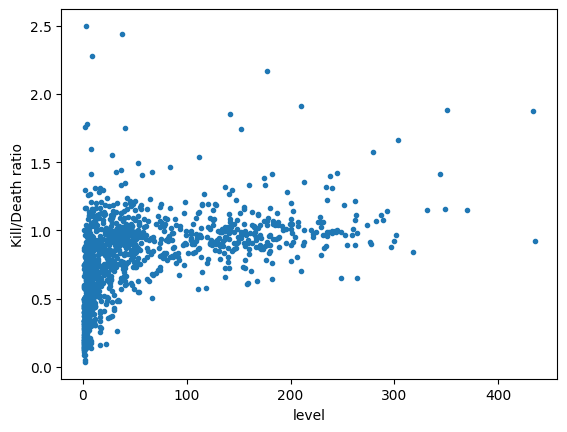

In [338]:
plt.scatter(df["level"],df["kdRatio"],marker='.')
plt.xlabel('level')
plt.ylabel('Kill/Death ratio')

Text(0, 0.5, 'losses')

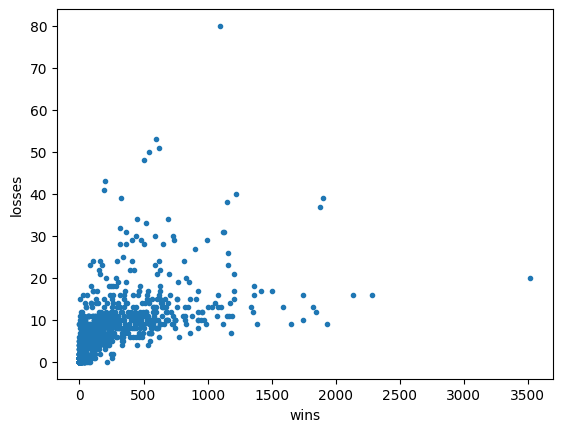

In [339]:
plt.scatter(df["wins"],df["losses"],marker='.')
plt.xlabel('wins')
plt.ylabel('losses')

In [340]:
#adding a new column like kdRatio column but for wins and losses
df["wlRatio"]=df["wins"]/(df["losses"]+df["wins"])

C:\Users\user\AppData\Local\Temp\ipykernel_17316\705816172.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [341]:
df.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,wlRatio
2,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64,NaN
3,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5,1.000000
4,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10,NaN
5,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321,0.985591
6,4,162,0.632812,4,6,2,0,568,8,35,2.000000,4,68,4836,24485,265.500000,5404,256,0.666667


In [342]:
#cleaning the new column
df["wlRatio"].replace([np.NaN],0)

2       0.000000
3       1.000000
4       0.000000
5       0.985591
6       0.666667
          ...   
1549    0.793103
1550    0.980769
1551    0.988206
1553    0.000000
1557    0.500000
Name: wlRatio, Length: 1202, dtype: float64

In [343]:
#another new column
df["efficiency_score"]=df["kills"]+(df["assists"]/4)

C:\Users\user\AppData\Local\Temp\ipykernel_17316\2190387670.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3-Starting To Normalize The Data And Clustering

In [344]:
x=df.values[:,:]
scaler=StandardScaler()
sdf=scaler.fit_transform(x)
sdf=np.nan_to_num(sdf)
sdf

array([[-0.6000242 , -0.55025016,  0.74996492, ..., -0.56508761,
         0.        , -0.55040001],
       [-0.59094444, -0.55758928, -1.2390183 , ..., -0.57181161,
         0.6462088 , -0.55744395],
       [-0.6000242 , -0.55758928, -1.8691912 , ..., -0.57124178,
         0.        , -0.55744395],
       ...,
       [ 2.95015968,  4.69010545,  0.89924444, ...,  4.26297526,
         0.59908531,  4.65510199],
       [-0.6000242 , -0.55197027, -1.13754978, ..., -0.55893343,
         0.        , -0.55207192],
       [-0.59699761, -0.55380505, -0.33700611, ..., -0.56656917,
        -1.35149051, -0.55352456]])

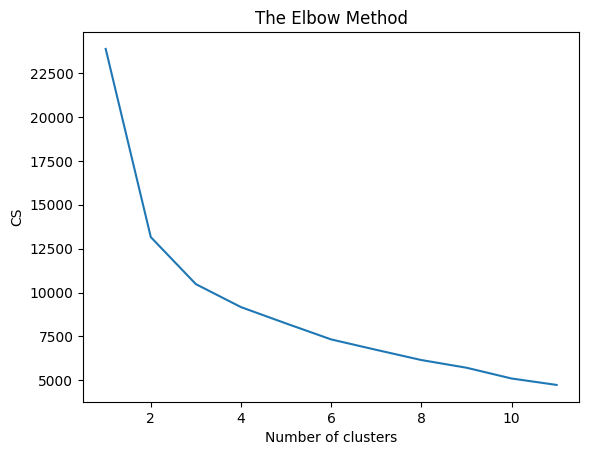

In [345]:
#using the elbow method to estimate a good number of clusters
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(sdf)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.show()

In [346]:
#getting started with the clustering
k_means=KMeans(init="k-means++",n_clusters=3,n_init=8)
k_means.fit(sdf)
labels=k_means.labels_
print(labels)

[0 0 0 ... 2 0 0]


In [347]:
df["C_Group"]=labels
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17316\1883080627.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,wlRatio,efficiency_score,C_Group
2,0,66,1.031250,0,9,0,110,0,32,16,...,0,1,0,48300,0.000000,0,64,NaN,66.25,0
3,3,2,0.400000,0,1,0,0,0,3,0,...,0,0,0,1150,0.000000,0,5,1.000000,2.00,0
4,0,2,0.200000,0,1,0,110,0,5,1,...,0,0,0,1000,0.000000,0,10,NaN,2.00,0
5,684,27011,1.066743,18,177,10,110,98332,1366,5113,...,588,6063,305319,3932335,255.672035,403651,25321,0.985591,28526.75,2
6,4,162,0.632812,4,6,2,0,568,8,35,...,4,68,4836,24485,265.500000,5404,256,0.666667,179.00,0


In [348]:
df.groupby('C_Group').mean()


,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,wlRatio,efficiency_score
C_Group,,,,,,,,,,,,,,,,,,,,
0,39.424242,677.286061,0.701399,5.278788,19.055758,3.183030,46.413333,1737.324848,136.904242,120.368485,37.515755,21.476364,129.368485,8142.130909,2.218378e+05,110.667033,9879.455758,804.530909,0.766218,709.628182
1,390.332180,9199.553633,0.987190,15.692042,114.955017,12.702422,84.145329,25383.072664,1090.802768,1603.851211,6.207886,293.837370,1629.709343,112898.211073,2.234007e+06,184.786508,138280.785467,9454.550173,0.960220,9606.980969
2,1056.443182,29881.579545,1.017178,20.750000,226.102273,16.795455,95.693182,83240.159091,2670.909091,4769.806818,3.334035,899.602273,5576.215909,355880.590909,6.031851e+06,204.777636,439120.750000,30009.068182,0.982163,31275.633523


In [349]:
df.groupby("C_Group")["level","kdRatio","wlRatio"].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_17316\3373007655.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,level,kdRatio,wlRatio
C_Group,,,
0,19.055758,0.701399,0.766218
1,114.955017,0.987190,0.960220
2,226.102273,1.017178,0.982163


4-Visualizating The Clusters

First With Matplotlib Library

C:\Users\user\AppData\Local\Temp\ipykernel_17316\164150775.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



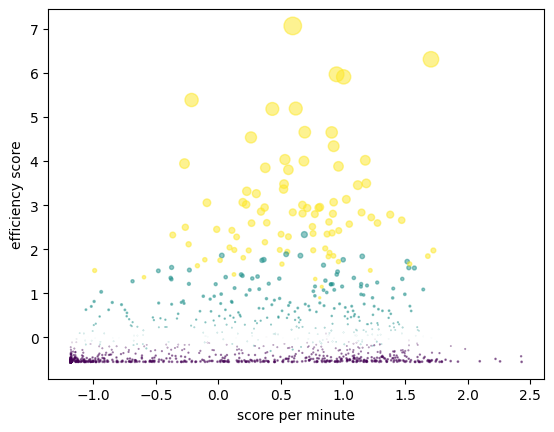

In [351]:
area = np.pi * ( sdf[:, 1])**2
plt.scatter(sdf[:,15],sdf[:,19],s=area,c=labels.astype(np.float),alpha=0.5)
plt.xlabel('score per minute')
plt.ylabel('efficiency score')
plt.show()

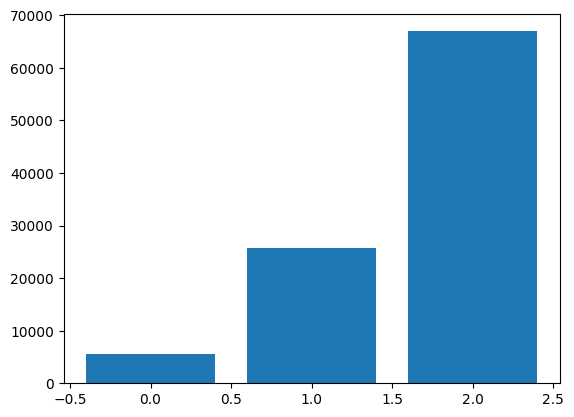

In [363]:
plt.bar(df["C_Group"],df["kills"])
plt.show()

Now With Seaborn

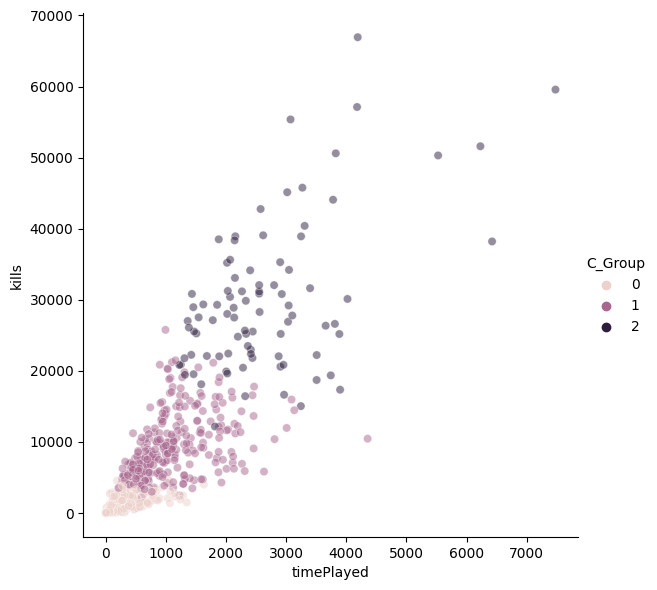

In [352]:
sns.relplot(x="timePlayed", y="kills", hue="C_Group",
            alpha=.5,
            height=6, data=df)

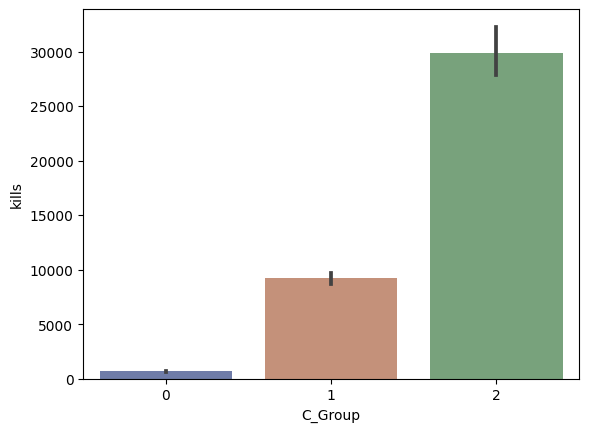

In [353]:
g = sns.barplot(
    data=df,
    x="C_Group", y="kills",
    palette="dark", alpha=.6)

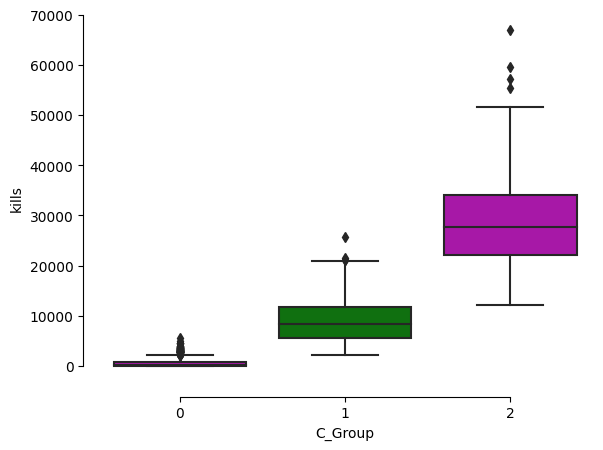

In [354]:
sns.boxplot(x="C_Group", y="kills",
            palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

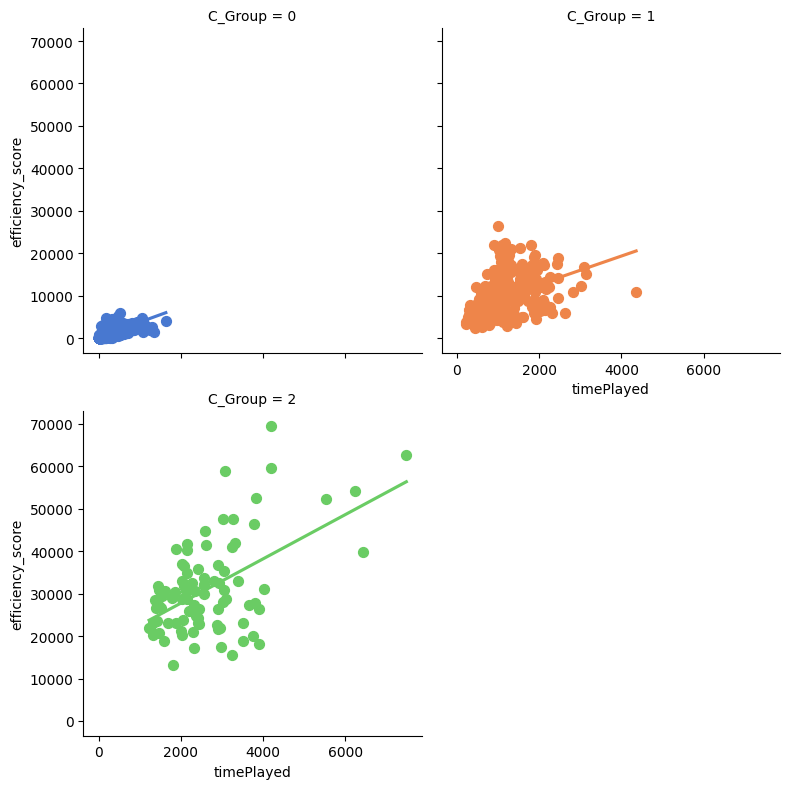

In [355]:
sns.lmplot(
    data=df, x="timePlayed", y="efficiency_score", col="C_Group", hue="C_Group",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1})